<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis-(Python)" data-toc-modified-id="Exploratory-data-analysis-(Python)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis (Python)</a></span><ul class="toc-item"><li><span><a href="#Importing-the-files-and-libraries" data-toc-modified-id="Importing-the-files-and-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing the files and libraries</a></span></li><li><span><a href="#Studying-the-files" data-toc-modified-id="Studying-the-files-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Studying the files</a></span></li><li><span><a href="#Checking-the-data-types" data-toc-modified-id="Checking-the-data-types-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Checking the data types</a></span></li><li><span><a href="#Identifying-the-top-10-neighborhoods" data-toc-modified-id="Identifying-the-top-10-neighborhoods-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Identifying the top 10 neighborhoods</a></span></li><li><span><a href="#Making-Graphs" data-toc-modified-id="Making-Graphs-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Making Graphs</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Testing-hypotheses" data-toc-modified-id="Testing-hypotheses-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing hypotheses</a></span><ul class="toc-item"><li><span><a href="#Levene-Test" data-toc-modified-id="Levene-Test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Levene Test</a></span></li><li><span><a href="#Student-Test" data-toc-modified-id="Student-Test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Student Test</a></span></li><li><span><a href="#Levene-Test-for-Saturday-of-the-46th-Week" data-toc-modified-id="Levene-Test-for-Saturday-of-the-46th-Week-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Levene Test for Saturday of the 46th Week</a></span></li><li><span><a href="#Student-Test-for-Saturday-of-the-46th-Week" data-toc-modified-id="Student-Test-for-Saturday-of-the-46th-Week-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Student Test for Saturday of the 46th Week</a></span></li></ul></li><li><span><a href="#General-Conclusion" data-toc-modified-id="General-Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>General Conclusion</a></span></li></ul></div>

# Project Description

In this project, I have worked as an analyst for a new ride-sharing company in Chicago. My task was to find the patterns in the available information, to try to understand passenger preferences and the impact of external factors on rides.

I have worked with a database, analyzed data from competitors and tested hypotheses about the impact of weather on ride frequency. 

From the previous sections, I had retrieved the data using SQL, then created two different datasets from them. In the following steps, we will complete the other steps using Python.

## Exploratory data analysis (Python)

For these two datasets we need to:

- import the files,

- study the data which the files contain in,

- make sure whether the data types are correct,

- identify the top 10 neighborhoods in terms of drop-offs,

- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs,

- draw conclusions based on each graph and explain the results.

### Importing the files and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import display, Image

### Studying the files

In [2]:
company_trips = pd.read_csv('D:/workspace/datasets/project_sql_result_01.csv')
location_trips = pd.read_csv('D:/workspace/datasets/project_sql_result_04.csv')

display(company_trips)
display(location_trips)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


- The first table contains the **company names** and the **amounts of their trips**.
- The second table contains the **dropoff neighborhood** and the **number of average trips** for related neighborhoods.

In [3]:
display(company_trips.isnull().sum())

company_name    0
trips_amount    0
dtype: int64

In [4]:
display(location_trips.isna().sum())

dropoff_location_name    0
average_trips            0
dtype: int64

- **No missing values**, that's pretty good. We can continue to analyze.
- We will look the tables' infromation with info method.

### Checking the data types

In [5]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
display(company_trips['company_name'].apply(type).unique())

array([<class 'str'>], dtype=object)

In [8]:
display(location_trips['dropoff_location_name'].apply(type).unique())

array([<class 'str'>], dtype=object)

- The first table contains **64 rows**, and the second table contains **94 rows**. All of the rows are filled, there aren't any missing values, we had also checked in the previous step.
- Names' types are **object**, all of the names are string values. The type of numbers are **'int' for the first table and 'float' for the second**. The data types are normal. We can continue to analyze.
- We will check the values with describe function.

In [9]:
display(company_trips.describe().T)

,count,mean,std,min,25%,50%,75%,max
trips_amount,64.0,2145.484375,3812.310186,2.0,20.75,178.5,2106.5,19558.0


- For the first table, the mean is bigger than median. It shows us that **some big companies have more trips than many small companies**. 'Big fish eats little fish.' 
- We will see the distribution on the graph in the next steps, but we can say that the graph has **positive skewness**.

In [10]:
display(location_trips.describe().T)

,count,mean,std,min,25%,50%,75%,max
average_trips,94.0,599.953728,1714.591098,1.8,14.266667,52.016667,298.858333,10727.466667


- Mean value is also bigger than the median for the second table. The distribution is similar and it shows us **some neighborhoods use the cabs frequently, while many others rarely**.

In [11]:
display(company_trips.describe(include=['object']).T)

,count,unique,top,freq
company_name,64,64,Flash Cab,1


- All company names are **unique**.

In [12]:
display(location_trips.describe(include=['object']).T)

,count,unique,top,freq
dropoff_location_name,94,94,Loop,1


- All neighborhoods are **unique.**
- There are **no duplicated values** in the tables.

### Identifying the top 10 neighborhoods

- We will find the top 10 neighborhoods in terms of drop-offs and save it in **'top_ten_locations'** table.

In [13]:
top_ten_locations = location_trips.nlargest(10, 'average_trips')
display(top_ten_locations)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Let's see them on the graph.

<a id='bar1'></a>

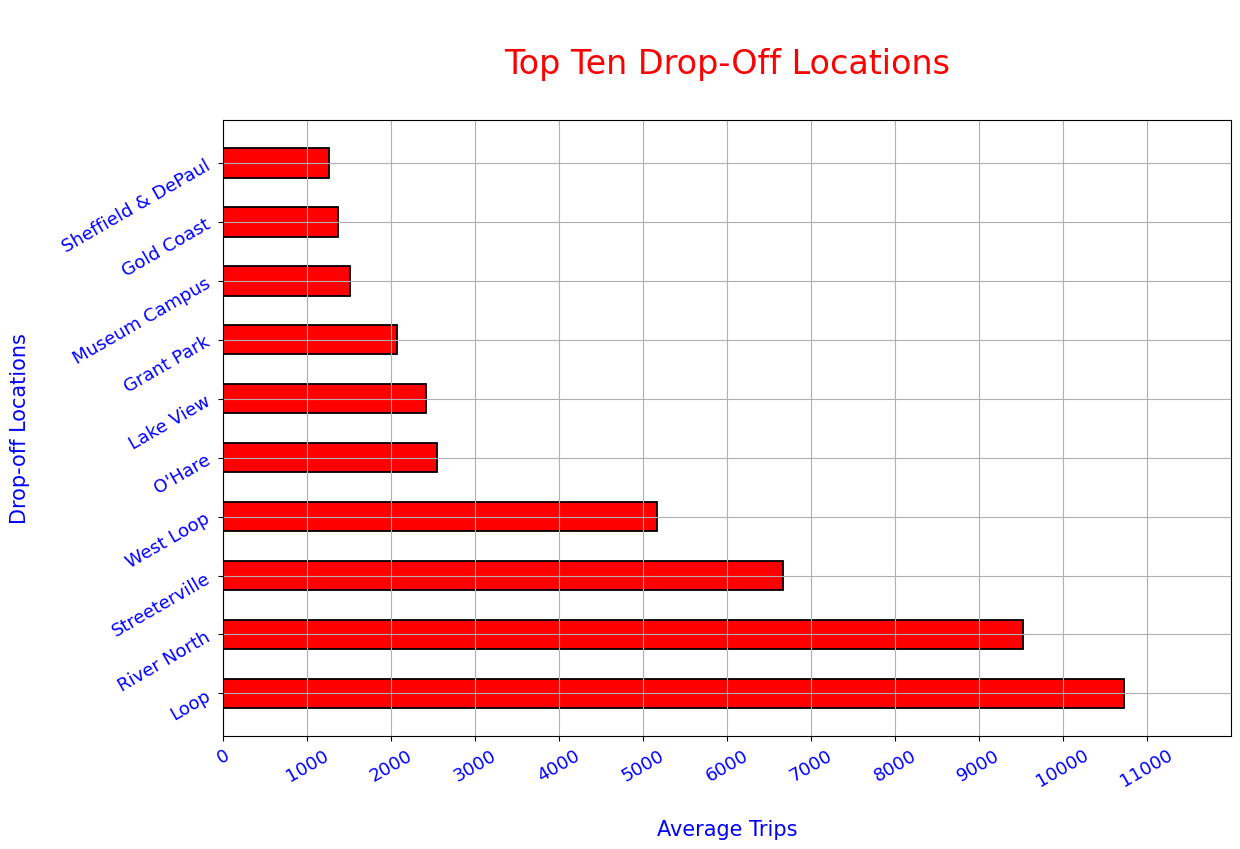

In [14]:
plt.figure(figsize=(13, 8))
(plt.barh(y=top_ten_locations['dropoff_location_name'], width=top_ten_locations['average_trips'], height=.5, 
          align='center', color='red', edgecolor='black', linewidth=1.3)
)
plt.grid(True)
plt.title('\nTop Ten Drop-Off Locations\n', size=24, color='red')
plt.xlabel('\nAverage Trips', size=15, color='blue')
plt.xlim(0, 12000)
plt.xticks(range(0, 12000, 1000), rotation=30, size=13, color='blue')
plt.ylabel('Drop-off Locations\n', rotation=90, size=15, color='blue')
plt.yticks(rotation=30, size=13, color='blue');

- The most visited location is the neighborhood **Loop** and we can see the other top locations.

### Making Graphs

- We will see the **trips distribution of companies** and the **average trips graph of locations.**

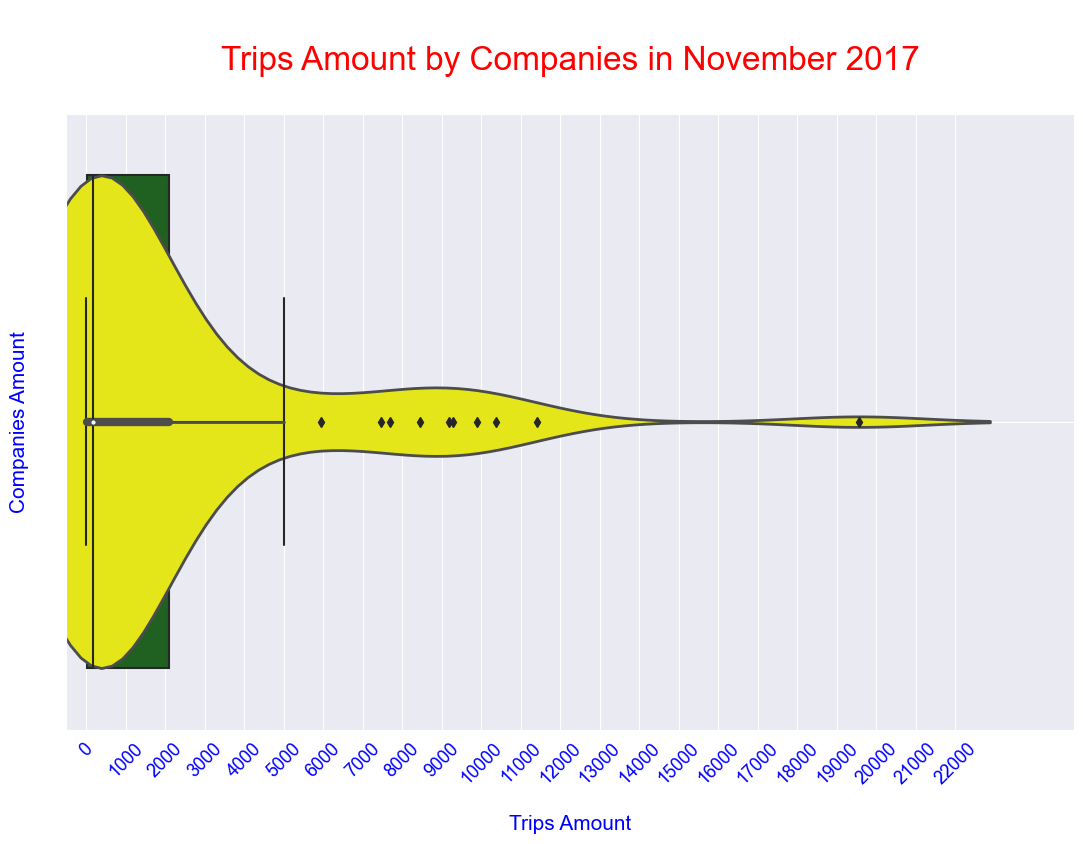

In [15]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
box = sns.boxplot(data = company_trips, x='trips_amount', color='green', saturation=0.5)
sns.violinplot(data = company_trips, x='trips_amount', color='yellow', saturation=0.8, inner='box', linewidth=2, ax=box)

plt.grid(True)
plt.xlabel('\nTrips Amount', size=15, color='blue')
plt.xlim(-500, 25000)
plt.ylabel('Companies Amount\n', size=15, color='blue')
plt.title('\nTrips Amount by Companies in November 2017\n', size=24, color='red')
plt.xticks(range(0, 23000, 1000), rotation=45, size=13, color='blue');

- We have already mentioned about the skewness of the distribution, as we said the distribution has **positive skewness.** As we mentioned in previous steps, **some big companies have bigger trips amount.** They are the reason of extending graph to the right. 
- The **median value is almost 180.** We can see that also on the graph. The **upper IQR limit is 5000**. There are **the biggest companies over this value.** **Many small companies have less than 2000 trips.** The **mean value is 2145**, it is **much bigger than median, or 3rd quartile.** 
- Let's look at the big fishes. We will show **the companies which have more than 5000 trips in November 2017.**

In [16]:
company_trips.query('trips_amount > 5000').sort_values(by='trips_amount', ascending=False)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [17]:
top_ten_companies = company_trips.nlargest(10, 'trips_amount')
top_ten_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<a id='bar2'></a>

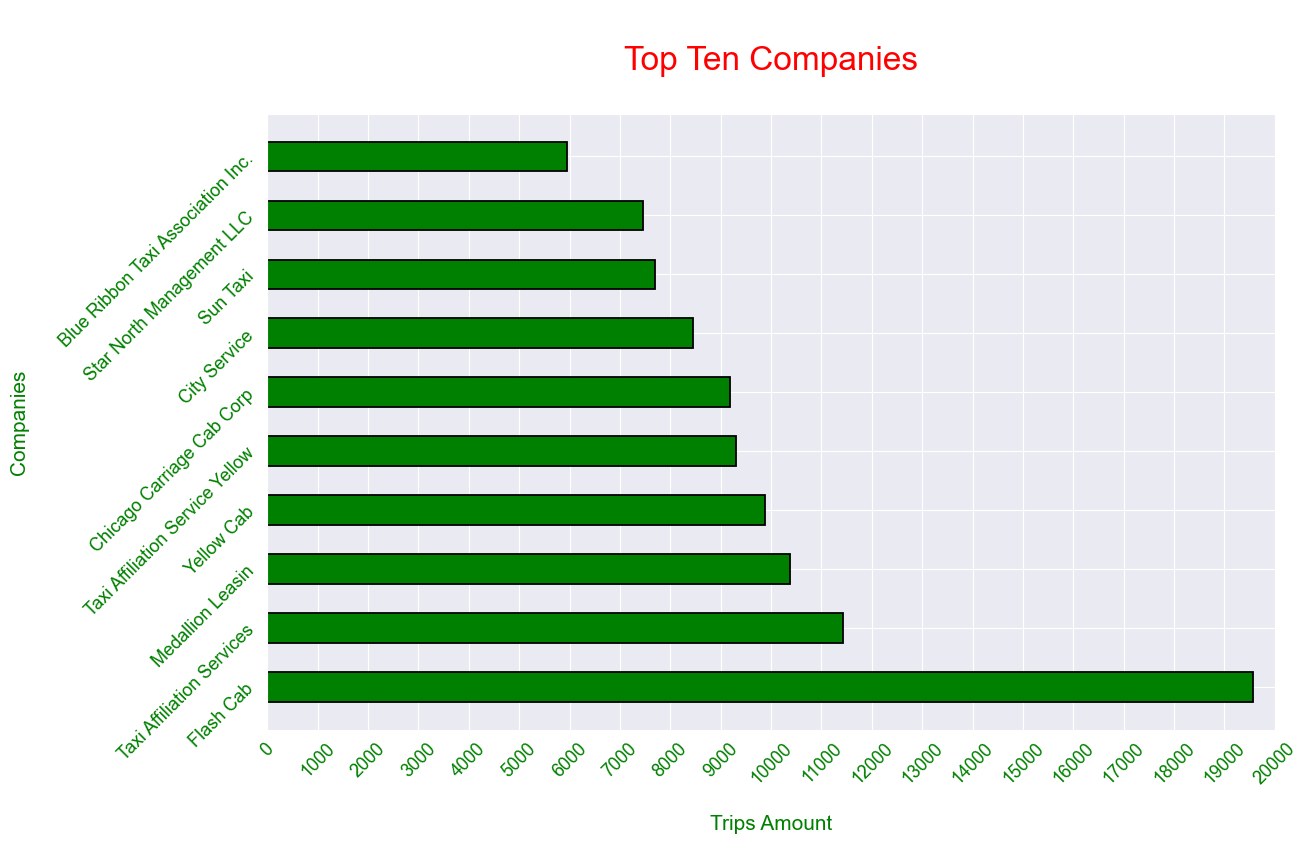

In [18]:
plt.figure(figsize=(13, 8))
(plt.barh(y=top_ten_companies['company_name'], width=top_ten_companies['trips_amount'], height=.5, 
          align='center', color='green', edgecolor='black', linewidth=1.3)
)
plt.grid(True)
plt.title('\nTop Ten Companies\n', size=24, color='red')
plt.xlabel('\nTrips Amount', size=15, color='green')
plt.xlim(0, 12000)
plt.xticks(range(0, 21000, 1000), rotation=45, size=13, color='green')
plt.ylabel('Companies\n', rotation=90, size=15, color='green')
plt.yticks(rotation=45, size=13, color='green');

- **Flash Cab** is the biggest. It's about **average 650 trips per day.** I wonder how much it earns on average from one trip. We don't know but it's clear it gains thousands of dollars in a day. What is the secret of success, unfortunately we can not analyze with these numbers. Let's leave business department thinks of it. We will keep going on analyze.

- Let's look at **the average trips** graphs of locations and top 10 locations.

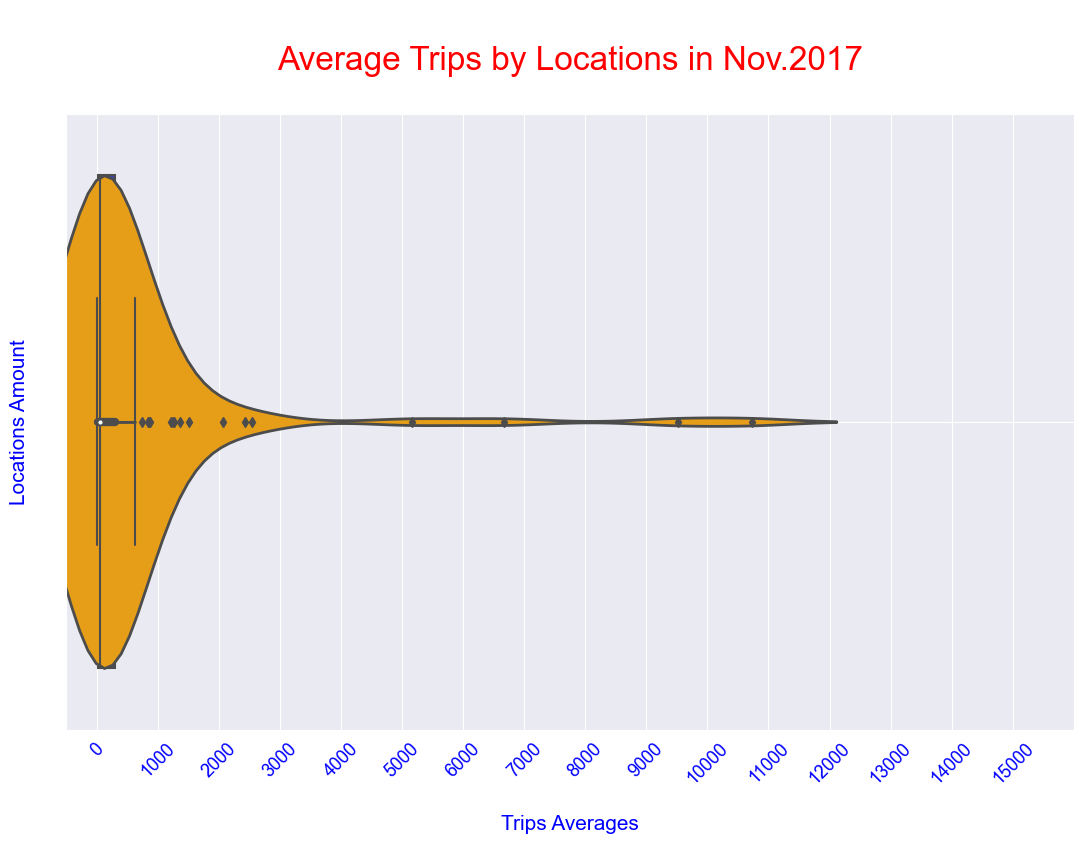

In [19]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
box = sns.boxplot(data = location_trips, x='average_trips', color='blue', saturation=0.5)
sns.violinplot(data = location_trips, x='average_trips', color='orange', saturation=0.8, inner='box', linewidth=2, ax=box)

plt.grid(True)
plt.xlabel('\nTrips Averages', size=15, color='blue')
plt.xlim(-500, 16000)
plt.ylabel('Locations Amount\n', size=15, color='blue')
plt.title('\nAverage Trips by Locations in Nov.2017\n', size=24, color='red')
plt.xticks(range(0, 16000, 1000), rotation=45, size=13, color='blue');

- **The mean of trip average is 600. The median is about 50.** There are many neighborhoods but we will narrow the locations with selecting the **top 10 neighborhoods** and we will select a neighborhood to pick a sample from them.
- Let's see the top ten locations' average trips distribution.

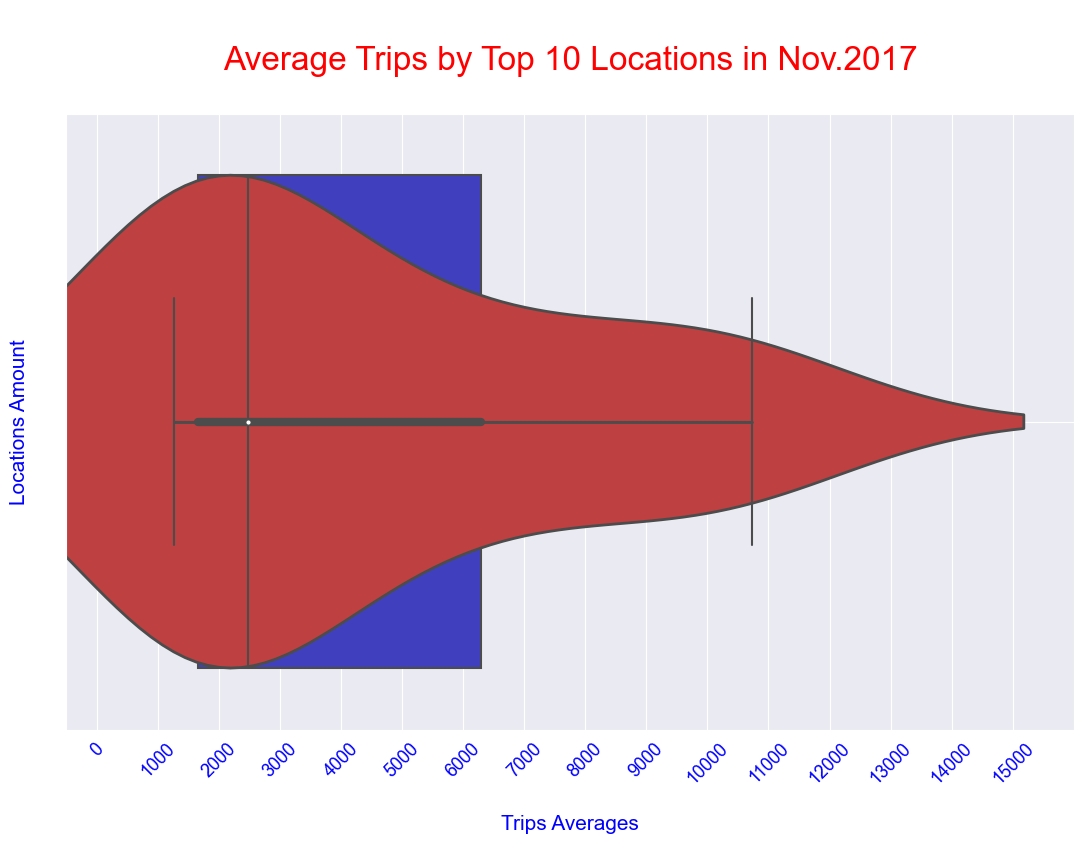

In [20]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
box = sns.boxplot(data = top_ten_locations, x='average_trips', color='blue', saturation=0.5)
sns.violinplot(data = top_ten_locations, x='average_trips', color='red', saturation=0.5, inner='box', linewidth=2, ax=box)

plt.grid(True)
plt.xlabel('\nTrips Averages', size=15, color='blue')
plt.xlim(-500, 16000)
plt.ylabel('Locations Amount\n', size=15, color='blue')
plt.title('\nAverage Trips by Top 10 Locations in Nov.2017\n', size=24, color='red')
plt.xticks(range(0, 16000, 1000), rotation=45, size=13, color='blue');

In [21]:
top_ten_locations.describe().T

,count,mean,std,min,25%,50%,75%,max
average_trips,10.0,4324.986667,3530.183508,1259.766667,1649.633333,2483.933333,6289.416667,10727.466667


- Top 10 list have still some locations which have much bigger trip averages than others in the same list. **'Loop' neighborhood is the biggest average trips value with 10727 average value.** Median value is the average of "O'Hare (2546.900000) and "Lake View" (2420.966667) locations which are in the middle of the list. We will analyze the rides from the Loop to O'Hare International Airport accordance with the weather conditions in the next step. 

### Conclusion

- This time, we were lucky that the data came cleaned and ready to analyze.
- First, we have analyzed **the trips of companies.** We found the companies which have **more than 5000 trips in a month.** **Flash Cab is the champion.**
- Secondly, we have analyzed **the average trips of neighborhoods accordance the dropping of location.** Then we selected **the top 10 locations.** **'Loop' has the biggest average trips with 10727.** 
- We will analyze the rides from the Loop to O'Hare International Airport.

## Testing hypotheses

**_"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."_**

(We assume that the rainy days as bad weather_conditions and we had got the dates for Saturdays)

- We had retrieved the weather conditions from a website. We have already got different tables about the trips of taxi companys from database. We have created a new table using data from the database and weather table from a weather forecasting web page. We will use that as a new table to test our hypothesis.

In [22]:
trips = pd.read_csv('D:/workspace/datasets/project_sql_result_07.csv')
display(trips)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


- We saved the table in *'trips'* variable.

In [23]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


- There are **3 parameters** and we need to convert **the type of 'start_ts' column to datetime.**

In [24]:
trips['start_ts'] = pd.to_datetime(trips['start_ts'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


- There are **1068 entries** in the table. There are **no missing values.** We will check the *unique values in the 'weather_conditions'* column with *value_counts()* method.

In [26]:
trips['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

- There isn't any different string, just only **'good'** and **'bad'.**

In [27]:
trips.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_seconds,1068.0,2071.731273,769.461125,0.0,1438.25,1980.0,2580.0,7440.0


- There are **some '0.0' sec-trips**, we will check them in the following steps. 
- **The mean and the median values are close**, difference is about 1,5 minute.

In [28]:
trips.describe(include = ['object']).T

,count,unique,top,freq
weather_conditions,1068,2,Good,888


- 2 unique values, 888 times 'Good'.

In [29]:
trips.describe(include = ['datetime'], datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
start_ts,1068,2017-11-11 11:53:12.134831360,2017-11-04,2017-11-04 15:00:00,2017-11-11 09:00:00,2017-11-18 05:00:00,2017-11-25 23:00:00


- **First date is 04-11-2017, and last day is 25-11-2017**. *More than half* of the table belongs to the period *after 11-11-2017.*
- Let's find the durations *grouped by week.*

In [30]:
trips['week'] = pd.DatetimeIndex(trips['start_ts']).week
trips

C:\Users\alper\AppData\Local\Temp\ipykernel_19856\3893439021.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  trips['week'] = pd.DatetimeIndex(trips['start_ts']).week


,start_ts,weather_conditions,duration_seconds,week
0,2017-11-25 16:00:00,Good,2410.0,47
1,2017-11-25 14:00:00,Good,1920.0,47
2,2017-11-25 12:00:00,Good,1543.0,47
3,2017-11-04 10:00:00,Good,2512.0,44
4,2017-11-11 07:00:00,Good,1440.0,45
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,47
1064,2017-11-11 10:00:00,Good,1318.0,45
1065,2017-11-11 13:00:00,Good,2100.0,45
1066,2017-11-11 08:00:00,Good,1380.0,45


In [31]:
trips.groupby('week').agg({'duration_seconds':'sum'})

,duration_seconds
week,
44,873616.0
45,758973.0
46,401962.0
47,178058.0


- **The 44th week has the longest duration.**
- We can go ahead the analysis.

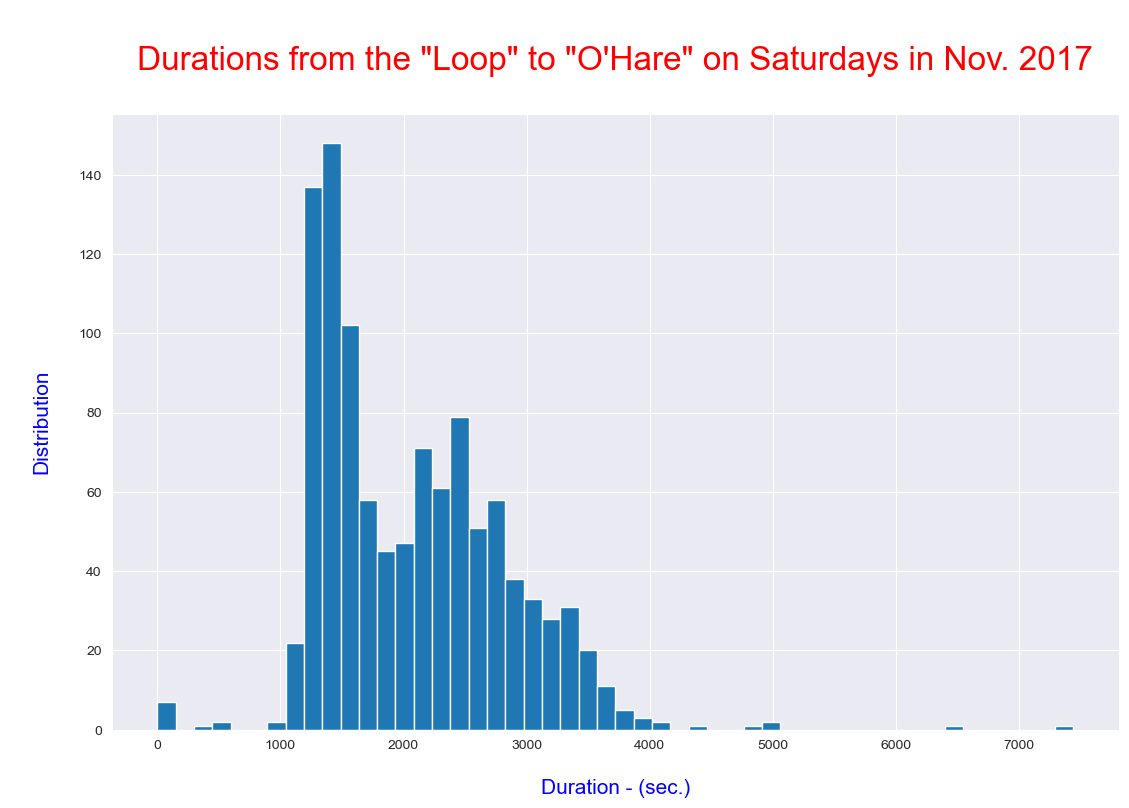

In [32]:
plt.figure(figsize=(13, 8))
trips['duration_seconds'].hist(bins=50)
plt.title('\nDurations from the "Loop" to "O\'Hare" on Saturdays in Nov. 2017\n', size=24, color='red')
plt.xlabel('\nDuration - (sec.)', size=15, color='blue')
plt.ylabel('\nDistribution\n', size=15, color='blue');

- There are **2 peak** in the distribution. The first is **about 1400 sec. (23 min.)** and the second is **about 2500 sec. (42 min.).**
- It seems like there are **some outliers extending after 4000 sec. and before 1000 sec.** We will analyze them in the following steps.
- **The '0' values might be technical errors, or taxi driver might forgot to open taximeter.** We plan to drop them after analysis.

- Let's find the outliers, check the Boxplot and Interquartiles.

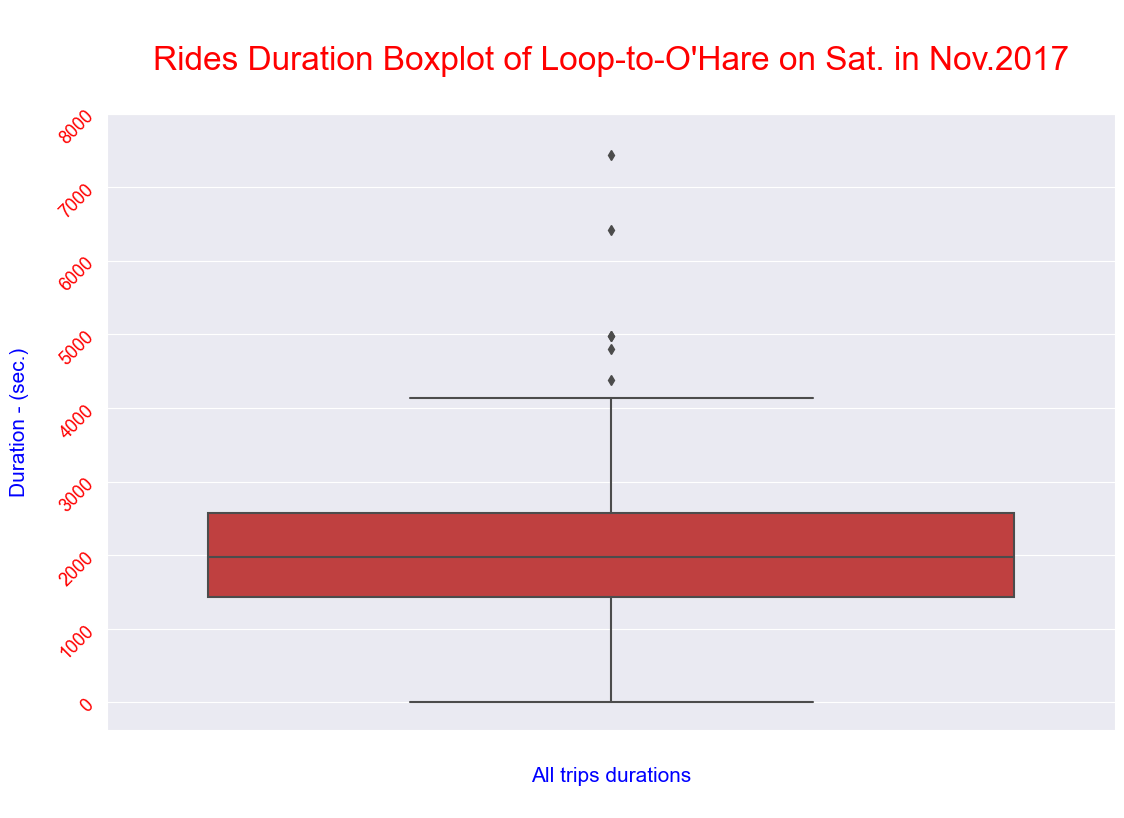

In [33]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=trips, y='duration_seconds', color='red', saturation=0.5)
plt.title('\nRides Duration Boxplot of Loop-to-O\'Hare on Sat. in Nov.2017\n', size=24, color='red')
plt.ylabel('Duration - (sec.)\n', size=15, color='blue')
plt.yticks(range(0, 9000, 1000), rotation=45, size=13, color='red')
plt.xlabel('\nAll trips durations\n', size=15, color='blue');

<a id='box'></a>

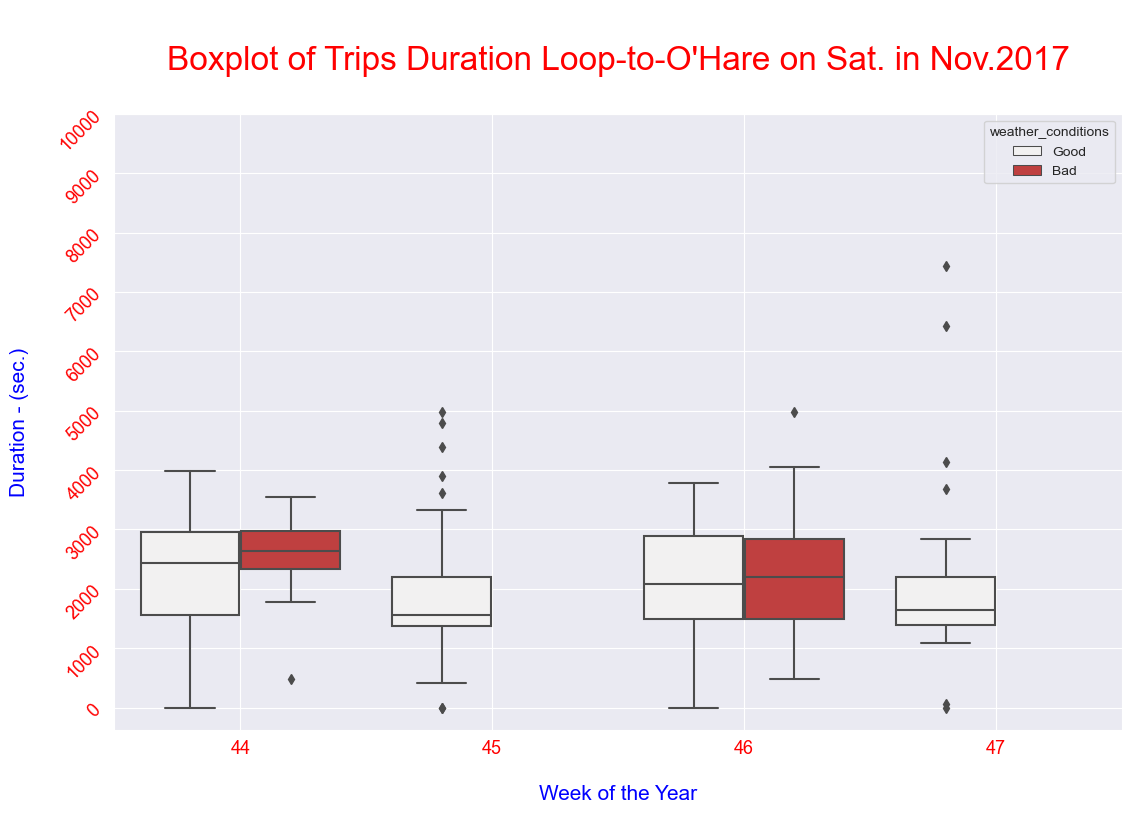

In [34]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=trips, y='duration_seconds', x='week', hue='weather_conditions', color='red', saturation=0.5)
plt.title('\nBoxplot of Trips Duration Loop-to-O\'Hare on Sat. in Nov.2017\n', size=24, color='red')
plt.ylabel('Duration - (sec.)\n', size=15, color='blue')
plt.yticks(range(0, 11000, 1000), rotation=45, size=13, color='red')
plt.xlabel('\nWeek of the Year\n', size=15, color='blue')
plt.xticks(size=13, color='red')
plt.grid(True);

We can get many information from the last graph. Let's brief:
- There are **bad weather for only 44th and 46th weeks.** There aren't any cab usages for other weeks. Probably the weather was good for these Saturdays.
- At the Saturday of the 44th week, average trip durations seem close, but there are many medium and short trips for good weather. **It's probably that the bad weather conditions last shortly periods.**
- **On the 46th week, the good and bad weather samples have close distribution.** Their average durations and other durations are so close and seem similar. We will evaluate this point in the hypothesis test step. To go to that section click [Hypotheses tests for 46th week](#week46)
- According to the first Boxplot graph, **we will exclude over 4000 minutes (more than 1 hour), and save them in another table named 'long_trips'.**

In [35]:
long_trips = trips.loc[trips['duration_seconds'] > 4000]
long_trips.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_seconds,8.0,5148.0,1187.644969,4044.0,4320.0,4890.0,5340.0,7440.0
week,8.0,46.0,0.925820,45.0,45.0,46.0,47.0,47.0


- There are **only 8 long trips.** Let's look the weather conditions for them.

In [36]:
long_trips['weather_conditions'].value_counts()

Good    6
Bad     2
Name: weather_conditions, dtype: int64

- They are existed **mostly in good days.** Let's look the average durations for them.

In [37]:
long_trips.groupby('weather_conditions').agg({'duration_seconds':'mean'})

,duration_seconds
weather_conditions,
Bad,4512.0
Good,5360.0


- **The good weather conditions have more durations for long trips.** I expected the contrary result. There are some reasons for that if we analyze deeply this situation but if we need to say, there could be some technical problems, or there might be more traffic jam from other days and hours. Or they were just normal and natural, it means they could be normal making 8 long trips among about 1000 trips. **We will evaluate them as outliers and exclude them in the following steps.**
- First we will examine the '0.0' and very short durations. We can select below 5 minutes as short trips. Let's look using query method.

In [38]:
trips.query('duration_seconds < 300.0')

,start_ts,weather_conditions,duration_seconds,week
15,2017-11-25 13:00:00,Good,60.0,47
163,2017-11-11 09:00:00,Good,0.0,45
168,2017-11-11 07:00:00,Good,0.0,45
204,2017-11-18 19:00:00,Good,0.0,46
552,2017-11-04 01:00:00,Good,0.0,44
801,2017-11-04 09:00:00,Good,0.0,44
1063,2017-11-25 11:00:00,Good,0.0,47


There are **7 trips below 5 minutes.** We will drop the 6 rows have '0.0' durations.

In [39]:
trips = trips.loc[(trips['duration_seconds'] > 0.0)]

And also **we will drop over 4000 seconds.**

In [40]:
trips = trips.loc[(trips['duration_seconds'] <= 4000)]

- We got rid of outliers.

Now **we will group the datasets by weather conditions.** One of them will be **'good_weather'** and the other will be **'bad_weather'.**

In [41]:
good_weather = trips.loc[trips['weather_conditions'] == 'Good']
bad_weather = trips.loc[trips['weather_conditions'] == 'Bad']

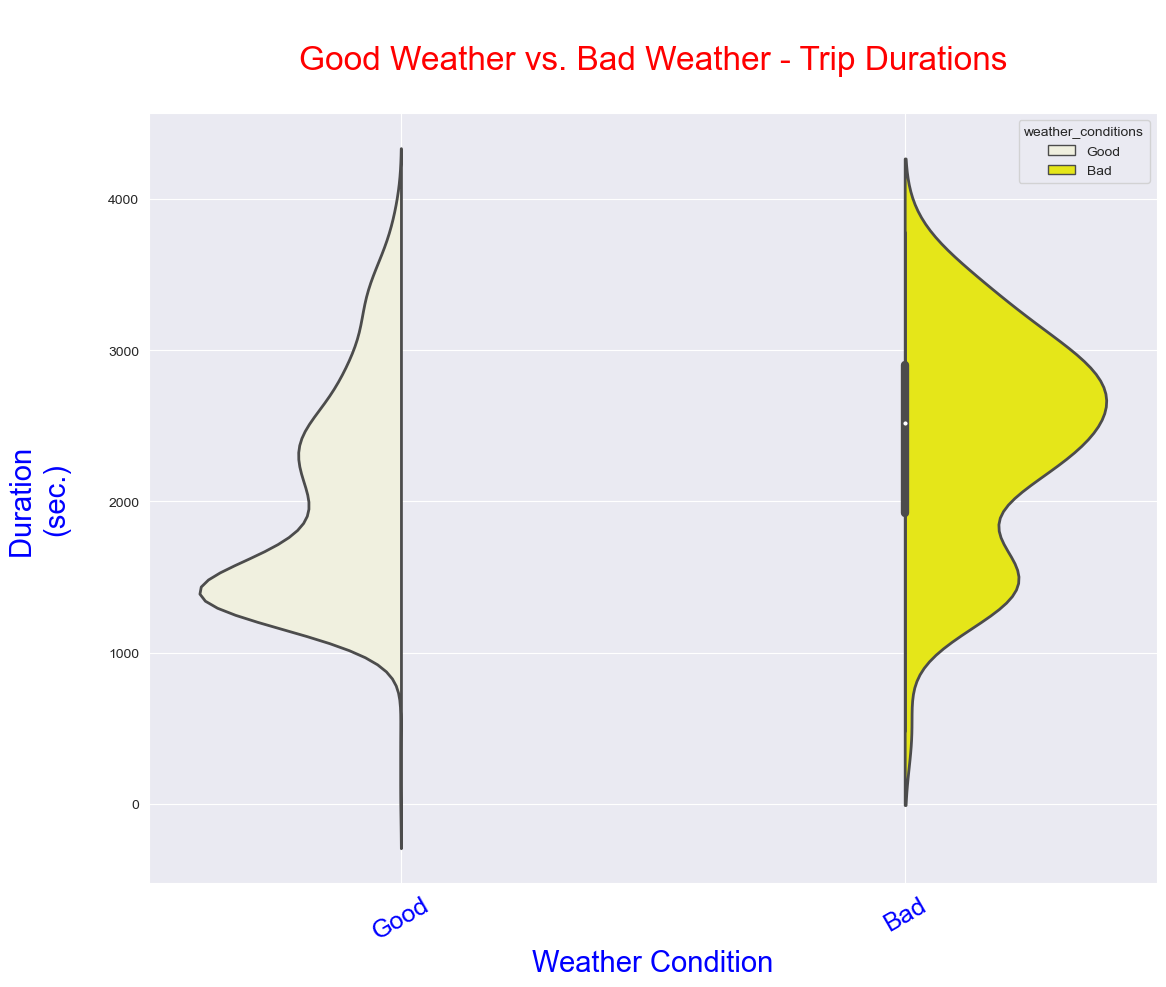

In [42]:
plt.figure(figsize=(13, 10))
sns.set_style("darkgrid")

sns.violinplot(data = trips, y='duration_seconds', x='weather_conditions', hue='weather_conditions', split=True, color='yellow', saturation=0.8, inner='box', linewidth=2)

plt.grid(True)
plt.xlabel('Weather Condition', size=21, color='blue')
plt.ylabel('Duration \n(sec.)\n', size=21, color='blue')
plt.title('\nGood Weather vs. Bad Weather - Trip Durations\n', size=24, color='red')
plt.xticks(rotation=30, size=18, color='blue');

- Distributions are similar for good and bad days, but bad days' distribution seems have bigger values than good days. Let's test our hypothesis.

### Levene Test

We will use *st.levene* method **to find the meaning of variance differences.** Let's formulate our hypotheses for levene test.

**- H0: 'The average durations' variances of good_weather and bad_weather are same.'**
    (var for good_weather = var for bad_weather)
**- H1: 'The average durations' variances of good_weather and bad_weather are not same.'**
    (var for good_weather < > var for bad_weather)
**- alpha = 0.05**

If the *p-value* will be bigger than the alpha, then we won't be able to assume the variances are different and we won't reject the null hypothesis, but we will assume the variances are equal.

In [43]:
alpha = 0.05

results = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Different variances assumed")
else:
    print("Equal variances assumed")

p-value 0.7135705086567987
Equal variances assumed


**- We assume that the variances are equal.** We will define that in the student test' *equal_var* parameter.

### Student Test

**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

(We assume that the rainy days as bad weather_conditions and we had got the dates for Saturdays)

(*'good_weather': Rides data from the Loop to O'Hare International Airport on good Saturdays*
(*'bad_weather': Rides data from the Loop to O'Hare International Airport on bad (rainy) Saturdays
                The bad_weather dataset normally has 'rainy' and 'stormy' weather information.*)



- **H0: 'The average trips duration of 'good_weather' and 'bad_weather' are same.'**
    (µ1 = µ2)

- **H1: 'The average trips duration of 'good_weather' and 'bad_weather' are not same.'**
    (µ1 < > µ2)
    
- alpha = 0.05

- We will use the *'scipy.stat.ttest_ind'* to test our hypotheses. The *'equal_var'* parameter will be *'True'* since we assumed the variances are same. If the p-value is bigger than the significance level (alpha), we will fail to reject the null hypothesis and assume the same average durtions for different weather conditions. Otherwise we will reject the null hypothesis.

In [44]:
alpha = 0.05

results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)

print("p-value: {}".format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.553857606148197e-13
We reject the null hypothesis


- The p values is significantly low. **We will reject the null hypothesis.**
**- We assume that the average durations are different for different weather conditions.**

In [45]:
print("The average duration of the trips in good weather conditions equal to {:->10.2f} sec.".format(good_weather['duration_seconds'].mean()))
print("The average duration of the trips in bad weather conditions equal to {:->11.2f} sec.".format(bad_weather['duration_seconds'].mean()))

The average duration of the trips in good weather conditions equal to ---1990.36 sec.
The average duration of the trips in bad weather conditions equal to ----2403.78 sec.


- We reject the null hypothesis because **p-value is too small**, it means that **the difference statistic is big.** **So we assumed the average duration in good weather and the average duration in bad weather are not same.** According to our alternative hypothesis, we assume that the average durations differ in the different weather conditions.
- We found the mean values of average durations. **The average duration of 'bad_weather' is bigger than the average duration of 'good_weather' (more than 400 hundred)** and we assume like that. 
- **So, people prefer taxis more in bad weather conditions on saturday weather or they just spend more times in cabs.**

### Levene Test for Saturday of the 46th Week

<a id='week46'></a>
- We mentioned the important point in the previous steps when we showed the boxplots and we had found the similarity of the samples for 46th week. If we compare two different samples, it's important to get the condition similarity of samples. If there aren't any bad weather condition on the 2 other weekends, we can skip them if we have other samples. We will try to test for only 46th week trips durations in this section.

-- to review the boxplot click -- [Boxplot grouped by weeks and weather conditions](#box)

In [46]:
week_46 = trips.loc[trips['week'] == 46]
week_46['weather_conditions'].value_counts()

Bad     98
Good    79
Name: weather_conditions, dtype: int64

- They are close to each other and enough to test the hypotheses. We will do the same previously steps for this tests.

In [47]:
week_46_good = week_46.loc[week_46['weather_conditions'] == "Good"]
week_46_bad = week_46.loc[week_46['weather_conditions'] == "Bad"]

- **H0: 'The average durations' variances of good_weather and bad_weather for Saturday of 46th Week are same.'**
    (var for good_weather = var for bad_weather)
- **H1: 'The average durations' variances of good_weather and bad_weather for Saturday of 46th Week are not same.'**
    (var for good_weather < > var for bad_weather)
- alpha = 0.05

In [48]:
alpha = 0.05

results = st.levene(week_46_good['duration_seconds'], week_46_bad['duration_seconds'])

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Different variances assumed")
else:
    print("Equal variances assumed")

p-value 0.7534906870030963
Equal variances assumed


**- We assumed variances are equal.**

### Student Test for Saturday of the 46th Week

**- H0: 'The average trip duration of 'good_weather' and 'bad_weather' for Saturday of 46th Week are same.'**
    (µ1 = µ2)
    
**- H1: 'The average trip duration of 'good_weather' and 'bad_weather' for Saturday of 46th Week are not same.'**
    (µ1 < > µ2)

- alpha = 0.05

In [49]:
alpha = 0.05

results = st.ttest_ind(week_46_good['duration_seconds'], week_46_bad['duration_seconds'], equal_var=True)

print("p-value: {}".format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.6537775901228253
We can't reject the null hypothesis


In [50]:
print("The average duration of the trips in the 46th week in good weather conditions equal to {:->10.2f} sec.".format(week_46_good['duration_seconds'].mean()))
print("The average duration of the trips in the 46th week in bad weather conditions equal to {:->11.2f} sec.".format(week_46_bad['duration_seconds'].mean()))

The average duration of the trips in the 46th week in good weather conditions equal to ---2249.39 sec.
The average duration of the trips in the 46th week in bad weather conditions equal to ----2196.29 sec.


- The results are absolutely different from the first test results, **because the distributions of the second samples are almost similar.** Although it sounds like good to test hypotheses in the same condition, it can be different in the real world. We need to more and accurate data to get an accurate results. We need to ask us why we need this data, and then we can clearly think. Why should I drop the other weeks' data? Is there any realistic answer? No, I couldn't find. We don't need to compare the same samples, but we need the more and right data, and we analyze the average durations for weathers. On the other hand, contrary to the previous discourse, I think that the more diversity we have in our conditions, the better. This will save us from overfitting in the future.
- **As a result, we will keep the first tests' results and ignore the second tests.**

## General Conclusion

- We created some tables using SQL in the previous SQL section of the project. We got some tables. 
- We retrieved the weather information from a web source. We created the tables depend on the weather conditions named 'trips' in our project using SQL with other database tables.
- In the Python section, we made Exploratory Data Analysis (EDA) and Hypothesis Tests (HT).
- In the EDA section, we studied the datasets, checked and corrected the columns, values and data types, detected and sorted the outliers, made the distribution graphs and boxplots, analyze the datasets.
- In the HT section, we made hypotheses tests. We decided to get all of the times' data in dataset.

    - H0: 'The average duration of 'good_weather' and 'bad_weather' are same.'
        (µ1 = µ2)
    - H1: 'The average duration of 'good_weather' and 'bad_weather' are not same.' 
        (µ1 < > µ2)
    
    - alpha = 0.05

- We rejected the null hypothesis. **We assumed the average duration in good weather and the average duration in bad weather are not same.** According to our alternative hypothesis, we assumed the average durations differ according to the weather condition, but we ignored that.
- **We assumed that the 'bad_weather' average duration is bigger than 'good_weather' (It's more than 400 hundred).** 
- **So, people prefer taxis more in bad weather conditions on Saturdays or they just spend more times in the cabs when the weather is bad.**
- "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." We couldn't reject this null hypothesis.

***